# AR(1)

The autoregressive model of order 1, denoted by $\text{AR}(1)$, random process is defined by,

$
\begin{align}
X_t=\varphi X_{t-1} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

For  $\text{AR}(1)$ can be shown that in the limit $t \rightarrow \infty$ with $\lvert \varphi \rvert < 1,$

$
\begin{align}
&\lim_{t \to \infty} \text{E}[X_t] = 0 \\
&\lim_{t \to \infty} \text{E}[X_t^2] = \frac{\sigma^2}{1-\varphi^2} \\
&\lim_{t \to \infty} \text{E}[X_t X_{t+n}] = \varphi^n \sigma^2
\end{align}
$

where $n>0$.The autocorrelation function, $\rho_\tau$, is defined by,

$
\begin{align}
\rho_{\tau} = \frac{\text{E}[X_t X_{t+\tau}]}{\sigma^2} = \varphi^{\tau}
\end{align}
$

Convergence of $\rho_{\tau}$ as $\tau \to \infty$ requires that $\lvert \varphi \rvert < 1$.

### Relation to $\text{MA}(\infty)$
AR(1) is related to $\text{MA}(\infty)$. To see this consider,

$
\begin{align}
X_t = \left( 1 - \varphi L \right)^{-1} \varepsilon_t
\end{align}
$

where $L$ is the lag operator,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

In the limit $t \to \infty$ it can be shown that for $\lvert \varphi \rvert < 1$,

$
\begin{align}
\left( 1 - \varphi L \right)^{-1} = \sum_{i = 0}^{\infty} \varphi^i L^i
\end{align}
$

It follows that,

$
\begin{align}
X_t = \sum_{i=0}^{\infty} \varphi^i L^i \varepsilon_t
\end{align}
$

which is $\text{MA}(\infty)$ with $\vartheta_i = \varphi^i$.

## Imports

In [34]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import stats
from lib.data.func import (DataFunc)
from lib.data.schema import (DataType)
from lib.plots.data import (DataPlotType, stack)
from lib.plots.func import (FuncPlotType, fcompare)
from lib.plots.cumu import (CumuPlotType, cumulative)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [106]:
def plot_labels(φ):
    return [f"φ={val}" for val in φ]

## Simulation $\varphi$ Scan 

In [157]:
σ = 1.0
nsample = 1000
nseries = 3

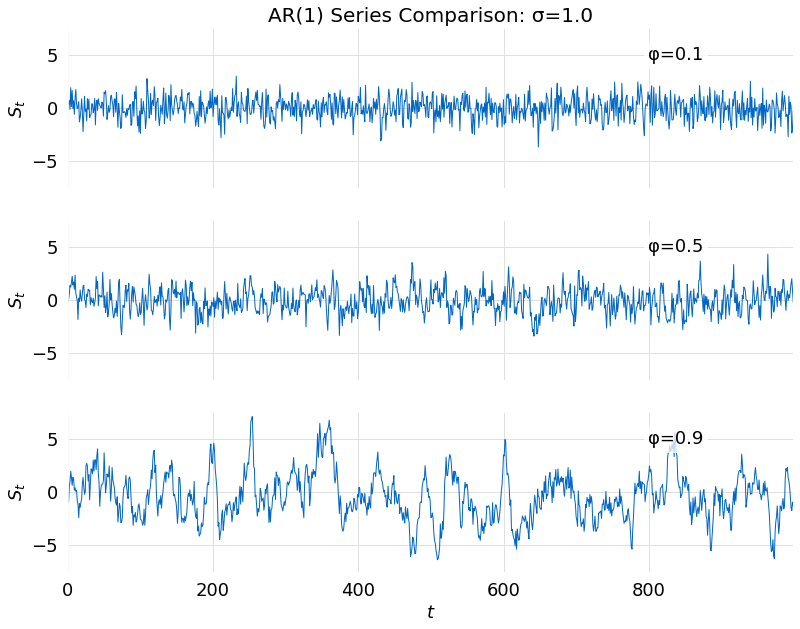

In [158]:
title = f"AR(1) Series Comparison: σ={σ}"
φ = numpy.array([0.1, 0.5, 0.9])
labels = plot_labels(φ) 
series = arima.ar1_series(φ, σ, nsample, nseries)
stack(series, ylim=[-7.5, 7.5], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

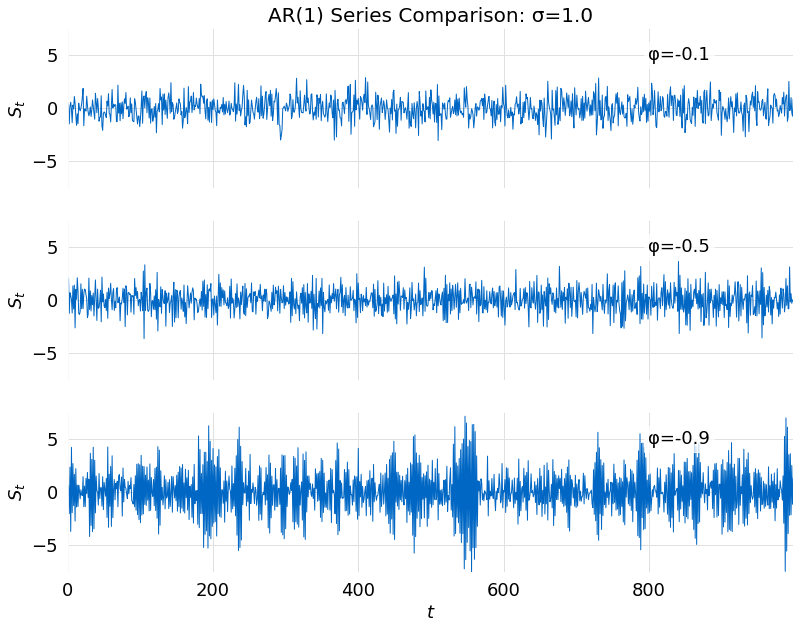

In [159]:
title = f"AR(1) Series Comparison: σ={σ}"
φ = [-0.1, -0.5, -0.9]
labels = plot_labels(φ) 
series = arima.ar1_series(φ, σ, nsample, nseries)
stack(series, ylim=[-7.5, 7.5], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Mean

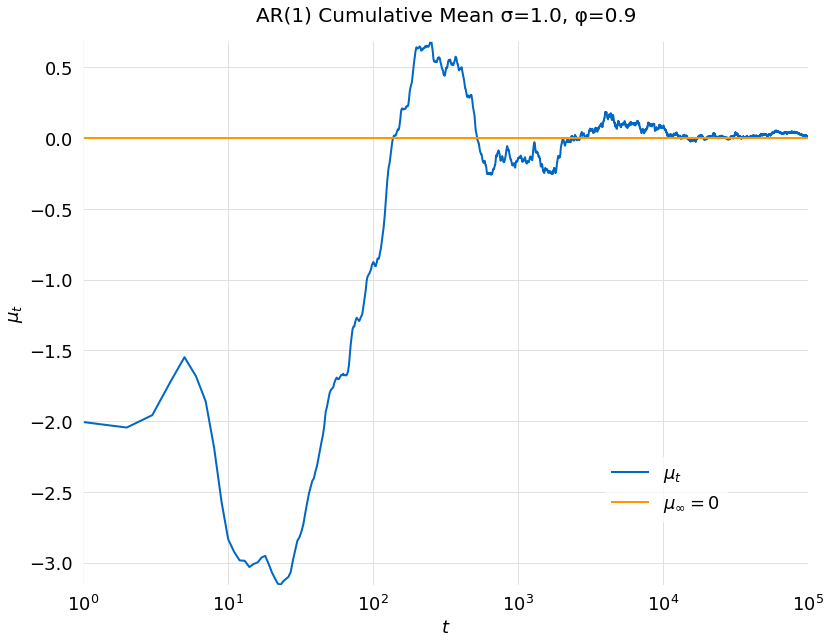

In [174]:
φ = 0.9
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}"
samples = DataFunc.apply_func_type(arima.ar1(φ, nsample, σ), DataType.CUMU_MEAN)
cumulative(samples, CumuPlotType.AR1_MEAN, title=title, title_offset=1.025)

In [175]:
φ = 0.5
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}"
samples = DataFunc.apply_func_type(arima.ar1(φ, nsample, σ), DataType.CUMU_MEAN)
cumulative(samples, CumuPlotType.AR1_MEAN, title=title, title_offset=1.025)

AttributeError: type object 'DataFunc' has no attribute 'apply_data_type'

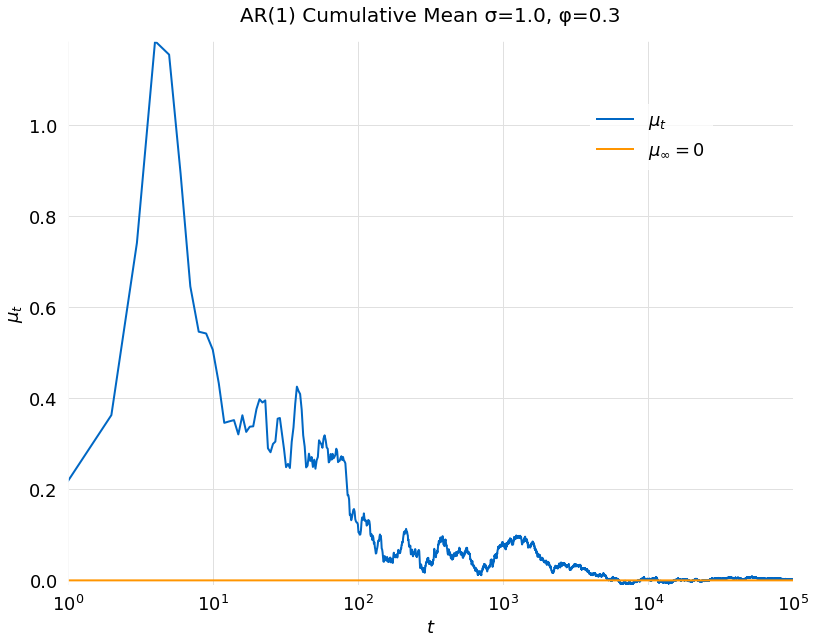

In [137]:
φ = 0.3
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}"
samples = DataFunc.apply_func_type(arima.ar1(φ, nsample, σ), DataType.CUMU_MEAN)
cumulative(samples, CumuPlotType.AR1_MEAN, title=title, title_offset=1.025)

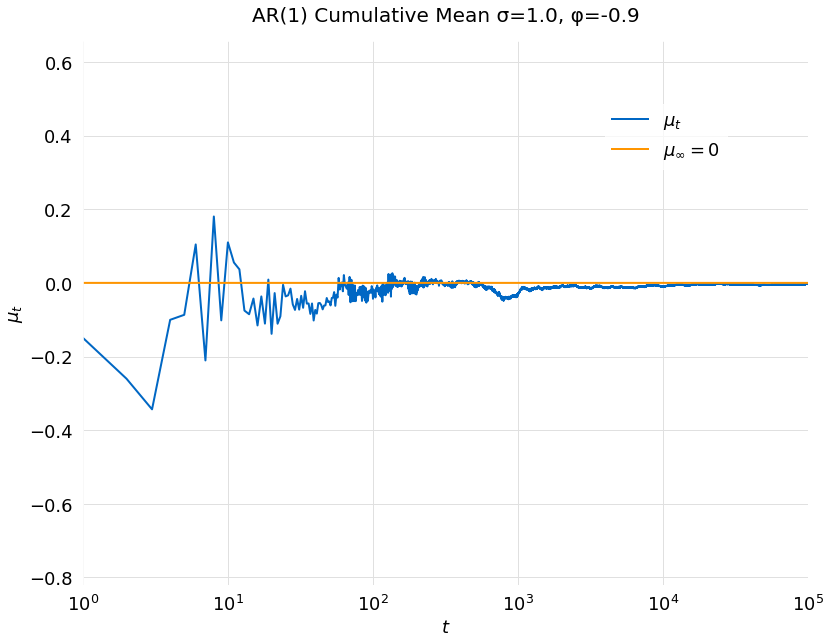

In [136]:
φ = -0.9
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}"
samples = DataFunc.apply_func_type(arima.ar1(φ, nsample, σ), DataType.CUMU_MEAN)
cumulative(samples, CumuPlotType.AR1_MEAN, title=title, title_offset=1.025)

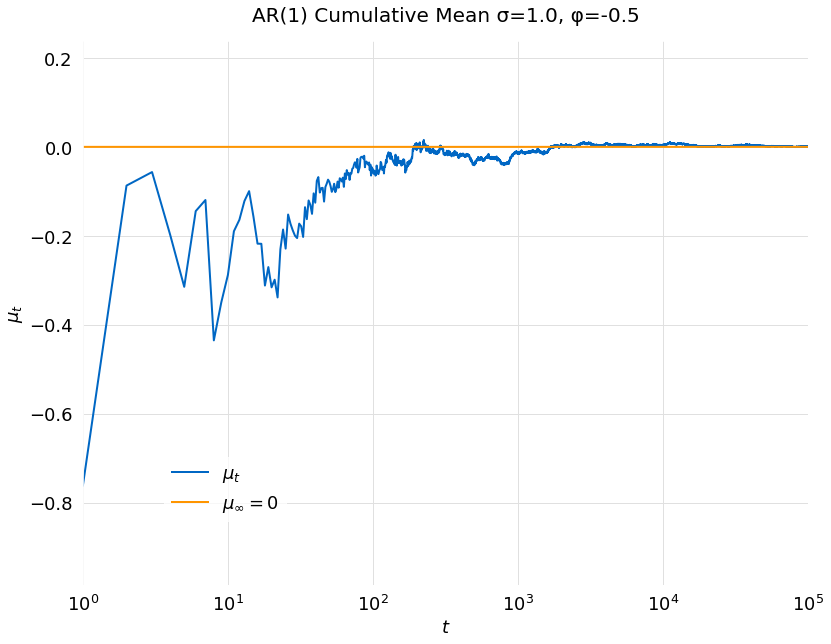

In [135]:
φ = -0.5
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}"
samples = DataFunc.apply_func_type(arima.ar1(φ, nsample, σ), DataType.CUMU_MEAN)
cumulative(samples, CumuPlotType.AR1_MEAN, title=title, title_offset=1.025)

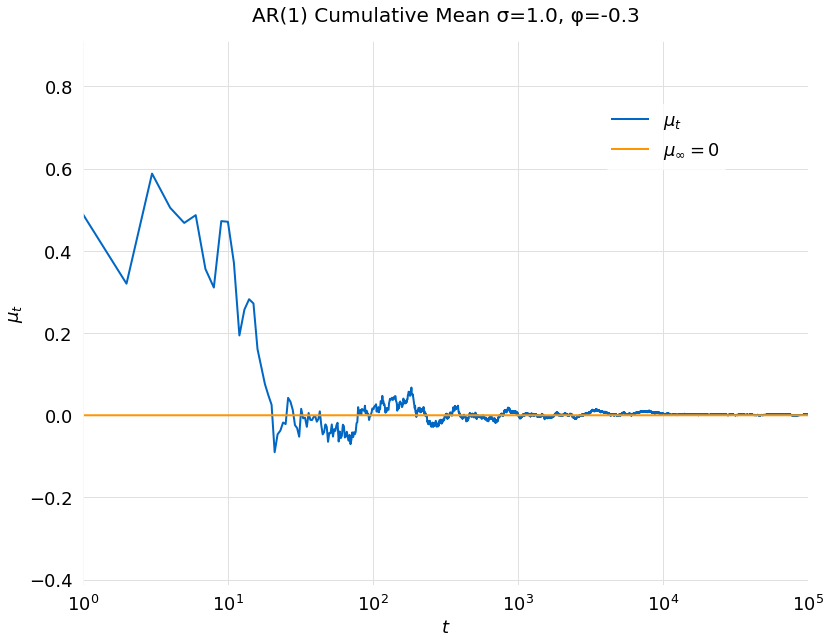

In [134]:
φ = -0.3
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}"
samples = DataFunc.apply_func_type(arima.ar1(φ, nsample, σ), DataType.CUMU_MEAN)
cumulative(samples, CumuPlotType.AR1_MEAN, title=title, title_offset=1.025)

## Standard Deviation

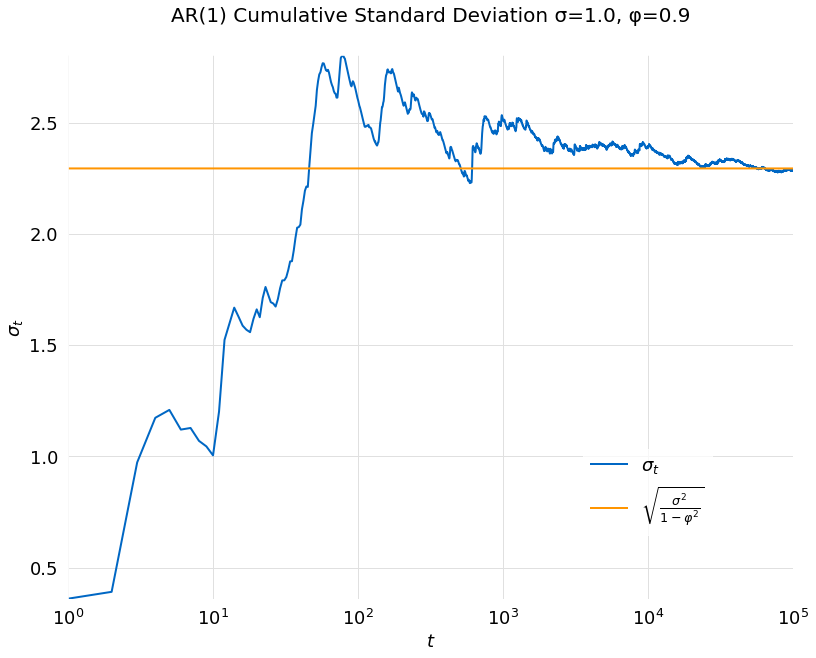

In [177]:
φ = 0.9
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}"
samples = DataFunc.apply_func_type(arima.ar1(φ, nsample, σ), DataType.CUMU_SD)
cumulative(samples, CumuPlotType.AR1_SD, title=title, title_offset=1.05, φ=φ, σ=σ)

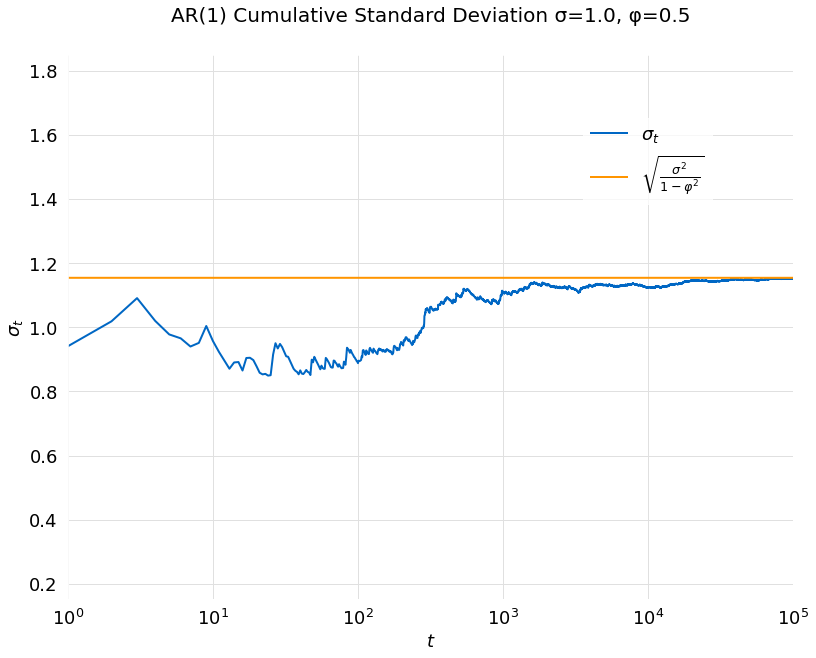

In [178]:
φ = 0.5
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}"
samples = DataFunc.apply_func_type(arima.ar1(φ, nsample, σ), DataType.CUMU_SD)
cumulative(samples, CumuPlotType.AR1_SD, title=title, title_offset=1.05, φ=φ, σ=σ)

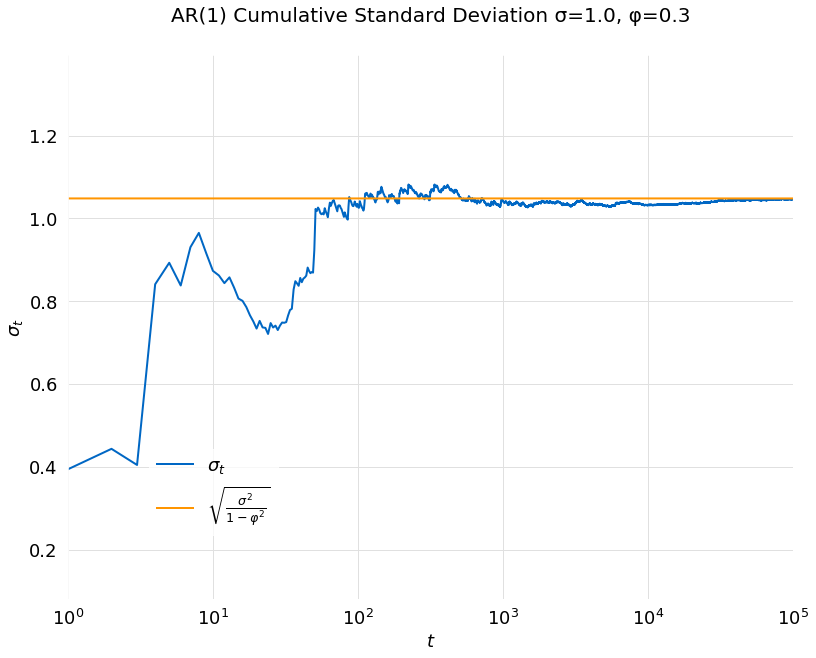

In [179]:
φ = 0.3
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}"
samples = DataFunc.apply_func_type(arima.ar1(φ, nsample, σ), DataType.CUMU_SD)
cumulative(samples, CumuPlotType.AR1_SD, title=title, title_offset=1.05, φ=φ, σ=σ)

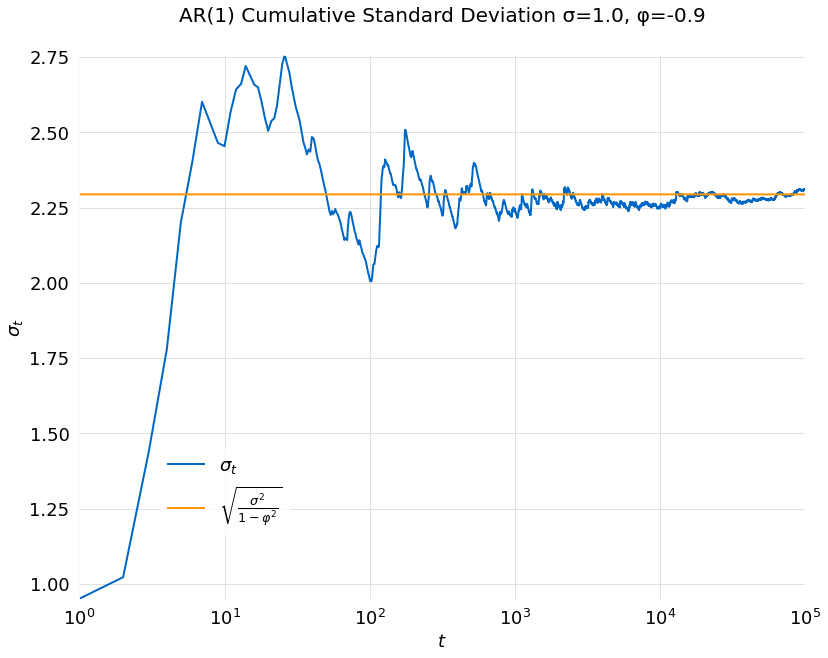

In [180]:
φ = -0.9
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}"
samples = DataFunc.apply_func_type(arima.ar1(φ, nsample, σ), DataType.CUMU_SD)
cumulative(samples, CumuPlotType.AR1_SD, title=title, title_offset=1.05, φ=φ, σ=σ)

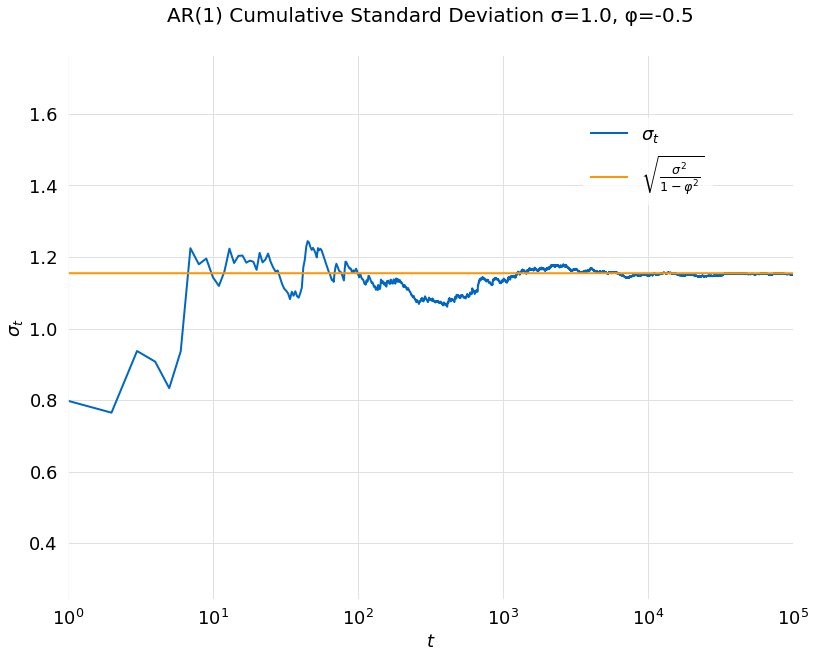

In [181]:
φ = -0.5
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}"
samples = DataFunc.apply_func_type(arima.ar1(φ, nsample, σ), DataType.CUMU_SD)
cumulative(samples, CumuPlotType.AR1_SD, title=title, title_offset=1.05, φ=φ, σ=σ)

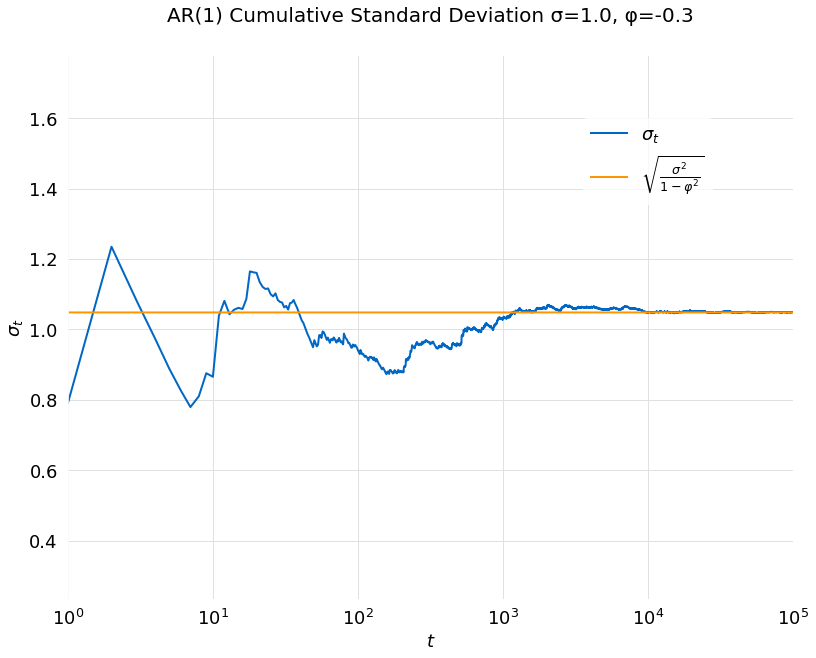

In [182]:
φ = -0.3
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}"
samples = DataFunc.apply_func_type(arima.ar1(φ, nsample, σ), DataType.CUMU_SD)
cumulative(samples, CumuPlotType.AR1_SD, title=title, title_offset=1.05, φ=φ, σ=σ)

## Autocorrelation

In [186]:
φ = 0.9
nlags = 31
nsample = 500
nsim = 1000
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = arima.ar1_ensemble(φ, σ, nsample, nsim)
ac = stats.ensemble_acf(samples, nlags)
fcompare(ac[:nplot], title=title, npts=nplot, plot_type=FuncPlotType.AR1_ACF)

NameError: name 'params' is not defined

{'Autocorrelation': {'npts': 500, 'DataType': <DataType.ACF: 4>}}


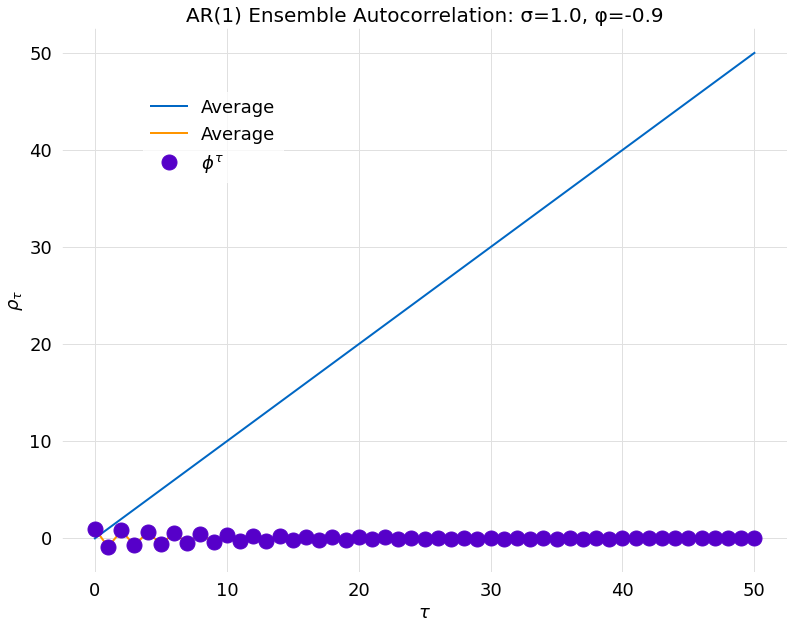

In [116]:
φ = -0.9
nplot = 51
nsample = 500
nsim = 1000
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = arima.ar1_ensemble(φ, σ, nsample, nsim)
ac = stats.ensemble_acf(samples)
fcompare(ac[:nplot], title=title, params=[φ], npts=nplot, plot_type=FuncPlotType.AR1_ACF)

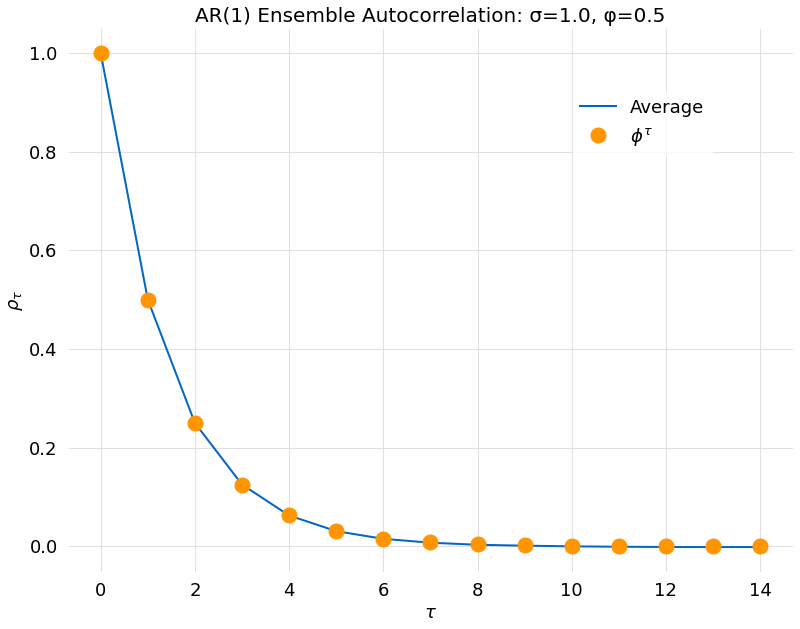

In [20]:
φ = 0.5
nplot = 15
nsample = 5000
nsim = 1000
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = arima.ar1_ensemble(φ, σ, nsample, nsim)
ac = stats.ensemble_acf(samples)
fcompare(ac[:nplot], title=title, params=[φ], npts=nplot, plot_type=FuncPlotType.AR1_ACF)

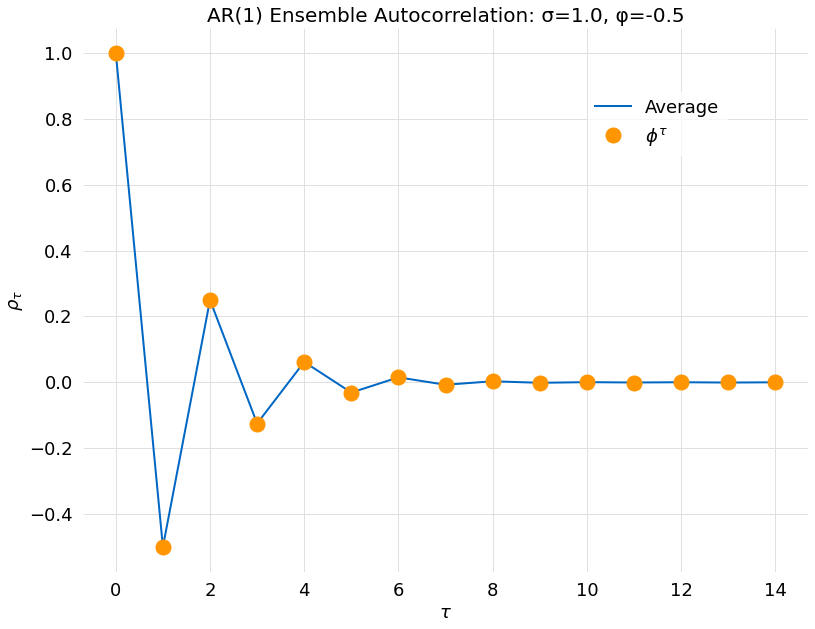

In [21]:
φ = -0.5
nplot = 15
nsample = 5000
nsim = 1000
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = arima.ar1_ensemble(φ, σ, nsample, nsim)
ac = stats.ensemble_acf(samples)
fcompare(ac[:nplot], title=title, params=[φ], npts=nplot, plot_type=FuncPlotType.AR1_ACF)

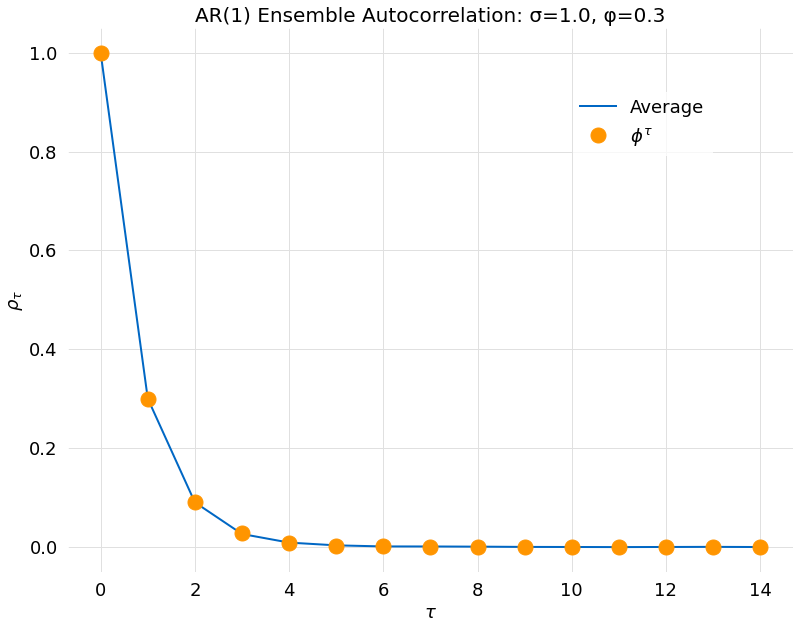

In [22]:
φ = 0.3
nsample = 5000
nsim = 1000
nplot = 15
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = arima.ar1_ensemble(φ, σ, nsample, nsim)
ac = stats.ensemble_acf(samples)
fcompare(ac[:nplot], title=title, params=[φ], npts=nplot, plot_type=FuncPlotType.AR1_ACF)

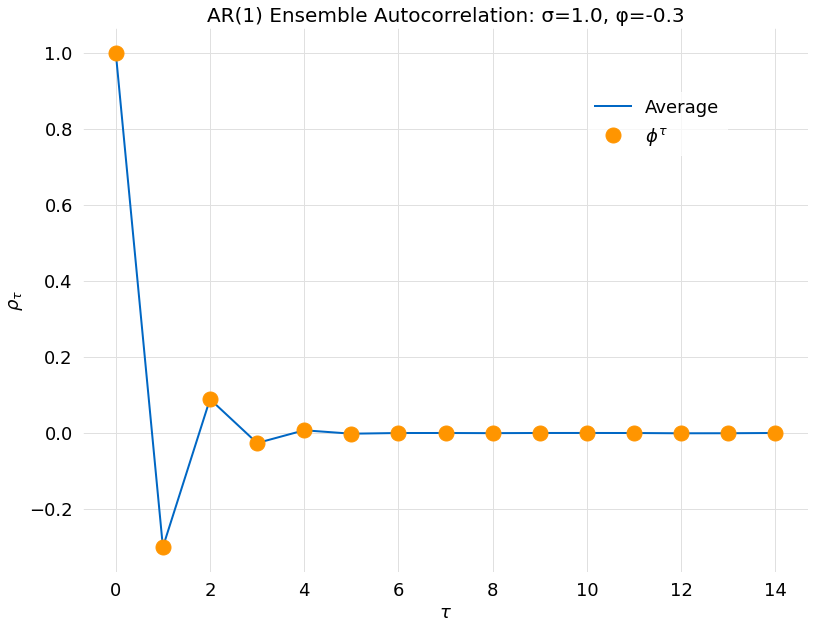

In [23]:
φ = -0.3
nplot = 15
nsample = 5000
nsim = 1000
title = f"AR(1) Ensemble Autocorrelation: σ={σ}, φ={φ}"
samples = arima.ar1_ensemble(φ, σ, nsample, nsim)
ac = stats.ensemble_acf(samples)
fcompare(ac[:nplot], title=title, params=[φ], npts=nplot, plot_type=FuncPlotType.AR1_ACF)